Hi! Welcome to NG1 for Phase 2. As you have learned some basics about NN, now we will apply those knowledge in some fun experiments.

By doing this NG Challenge, we hope that you have deeper understanding on:
1. Initialize NN module with architecture and hyperparameter in Keras.
2. Changing hyperparameter.
3. Flow of training model in Keras.
3. Loss curve and model performance analysis.

Enjoy!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def convert_to_gray(inp_data):
  inp_data=tf.squeeze(tf.image.rgb_to_grayscale(inp_data))
  return inp_data

def extract_data(cf10_x,cf10_y,id_class):
  idx=np.where(cf10_y == [id_class])[0]
  x_train=cf10_x[idx,:,:,:]
  return x_train

### Load Cifar 10 Dataset

In [3]:
#Load CIFAR-10 Dataset with Keras function
(cf10_x_train, cf10_y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
cf10_x_train.shape

(50000, 32, 32, 3)

For this experiment we use only three classes, automobile, ship and truck. Automobile is indexed as Class 1, Ship as Class 8, and Truck as Class 9 on the CIFAR-10. For our dataset, we will have Automobile as class 0, ship as class 1, and truck as class 2.

Color pictures are represented in 3 dimension, representing 3 color dimension R,G,B. Thus, for simpler processing, we also convert the images to grayscale.

In [5]:
x_train_1 = extract_data(cf10_x_train, cf10_y_train,1)
x_train_1 = convert_to_gray(x_train_1)

In [6]:
# Write your code to take data with label 8 and 9
x_train_2 = extract_data(cf10_x_train, cf10_y_train,7)
x_train_3 = extract_data(cf10_x_train, cf10_y_train,8)

x_train_2 = convert_to_gray(x_train_2)
x_train_3 = convert_to_gray(x_train_3)

Text(0.5, 1.0, 'Sample Truck')

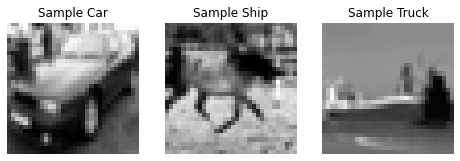

In [7]:
fig,axs = plt.subplots(1,3,figsize=(8,4))
axs[0].imshow(x_train_1[12],cmap='gray')
axs[0].axis('off');axs[0].set_title("Sample Car")
axs[1].imshow(x_train_2[5],cmap='gray')
axs[1].axis('off');axs[1].set_title("Sample Ship")
axs[2].imshow(x_train_3[5],cmap='gray')
axs[2].axis('off');axs[2].set_title("Sample Truck")
#plt.axis('off')

In [8]:
y_train_1 = tf.ones(x_train_1.shape[0])*0
y_train_2 = tf.ones(x_train_2.shape[0])*1
y_train_3 = tf.ones(x_train_3.shape[0])*2

In [9]:
x_train = tf.concat([x_train_1, x_train_2, x_train_3], 0)
y_train = tf.concat([y_train_1,y_train_2, y_train_3],0)
#y_train = tf.cast((y_train==1),tf.int32)

In [10]:
y_train

<tf.Tensor: shape=(15000,), dtype=float32, numpy=array([0., 0., 0., ..., 2., 2., 2.], dtype=float32)>

### Split dataset

Split the train set to 70% of training data and remaining 30% as validation set.

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(x_train.numpy(), y_train.numpy(), test_size=0.3, random_state=46)

In [14]:
X_train, X_val = tf.constant(X_train), tf.constant(X_val)
y_train, y_val = tf.constant(y_train), tf.constant(y_val)

### Build Network

We will build a function to create our intended network with given initializer and activation function. The flatten, first hidden layer, and output layer has been defined, now it's your turn to fill the remaining hidden layers.

In [15]:
def build_network(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
  # Flatten layer
  model.add(keras.layers.Flatten(input_shape=[32, 32]))

  # Hidden layers
  # First hidden layer
  model.add(keras.layers.Dense(300,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(50,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(15,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(8,kernel_initializer=weight_init, activation=hidden_act_func))
  

  # Output layer
  model.add(keras.layers.Dense(3, activation="softmax"))
  return model

In [17]:
X_train.shape

TensorShape([10500, 32, 32])

## Parameter setting

### Initializers

In [19]:
initializer1 = tf.keras.initializers.GlorotNormal() #Glorot Initializer
glorot_model = build_network(weight_init = initializer1)

#He Initializer
#Random normal Initializer

In [20]:
initializer2 = tf.keras.initializers.HeNormal() #He Initializer
he_model = build_network(weight_init = initializer2)

In [21]:
initializer3 = tf.keras.initializers.RandomNormal() #He Initializer
random_model = build_network(weight_init = initializer3)

Inference with initial weight

In [22]:
y_train

<tf.Tensor: shape=(10500,), dtype=float32, numpy=array([1., 2., 2., ..., 1., 2., 1.], dtype=float32)>

In [23]:
glorot_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [24]:
history_glorot = glorot_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 5s 7ms/step - loss: 1.0015 - accuracy: 0.4840
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.8903 - accuracy: 0.5973
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.8212 - accuracy: 0.6422
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7771 - accuracy: 0.6656
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7517 - accuracy: 0.6798
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7152 - accuracy: 0.6989
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 0.7081
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6788 - accuracy: 0.7158
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6674 - accuracy: 0.7188
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.7290

In [25]:
y_pred_glorot = glorot_model.predict(X_train)

In [26]:
he_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [27]:
history_he = he_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.9286 - accuracy: 0.5670
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8232 - accuracy: 0.6398
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7659 - accuracy: 0.6689
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7283 - accuracy: 0.6913
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7110 - accuracy: 0.6968
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6901 - accuracy: 0.7124
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6632 - accuracy: 0.7239
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6519 - accuracy: 0.7360
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6401 - accuracy: 0.7345
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6180 - accuracy: 0.7446

In [28]:
y_pred_he = he_model.predict(X_train)

In [29]:
random_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
history_random = random_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.0031 - accuracy: 0.4981
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8448 - accuracy: 0.6268
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7648 - accuracy: 0.6728
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7239 - accuracy: 0.6905
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7029 - accuracy: 0.7020
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6792 - accuracy: 0.7172
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6592 - accuracy: 0.7274
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6485 - accuracy: 0.7338
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6271 - accuracy: 0.7434
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6127 - accuracy: 0.7512

## Activation Function

Sigmoid actiation function

In [31]:
sigmoid_model = build_network(weight_init=tf.keras.initializers.GlorotNormal(), hidden_act_func='sigmoid')

In [32]:
sigmoid_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
history_sigmoid = sigmoid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.0306 - accuracy: 0.4904
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.9061 - accuracy: 0.6187
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8143 - accuracy: 0.6582
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7686 - accuracy: 0.6816
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7257 - accuracy: 0.7030
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7086 - accuracy: 0.7118
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6814 - accuracy: 0.7255
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.7348
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6493 - accuracy: 0.7408
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6312 - accuracy: 0.7528

ReLU Activation function

In [34]:
relu_model = build_network(weight_init=tf.keras.initializers.GlorotNormal(), hidden_act_func='relu')

In [35]:
relu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
history_relu = relu_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.0800 - accuracy: 0.4029
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 1.0438 - accuracy: 0.4537
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 1.0058 - accuracy: 0.4672
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.9755 - accuracy: 0.4758
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.9509 - accuracy: 0.5301
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.9184 - accuracy: 0.5648
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8154 - accuracy: 0.6378
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7403 - accuracy: 0.6850
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.7050
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6764 - accuracy: 0.7162

Linear activation function

In [37]:
linear_model = build_network(weight_init=tf.keras.initializers.GlorotNormal(), hidden_act_func='linear')

In [38]:
linear_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [39]:
history_linear = linear_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.0781 - accuracy: 0.5488
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.9033 - accuracy: 0.5935
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8826 - accuracy: 0.6126
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8676 - accuracy: 0.6196
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8640 - accuracy: 0.6222
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8595 - accuracy: 0.6210
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8494 - accuracy: 0.6310
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8529 - accuracy: 0.6270
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8527 - accuracy: 0.6252
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8437 - accuracy: 0.6373

Choose the most optimal activation function and let's move to the next step

### Optimizers

SGD

In [40]:
sigmoid_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [41]:
history_sgd = sigmoid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.5831 - accuracy: 0.7806
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5758 - accuracy: 0.7837
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5721 - accuracy: 0.7840
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5696 - accuracy: 0.7833
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.7870
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5657 - accuracy: 0.7865
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5637 - accuracy: 0.7882
Epoch 8/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5630 - accuracy: 0.7870
Epoch 9/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5615 - accuracy: 0.7872
Epoch 10/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5605 - accuracy: 0.7886

SGD with Nesterov

ADAM

In [42]:
sigmoid_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [43]:
history_adam = sigmoid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.5935 - accuracy: 0.7706
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5784 - accuracy: 0.7760
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5633 - accuracy: 0.7799
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5439 - accuracy: 0.7903
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5259 - accuracy: 0.7982
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5187 - accuracy: 0.8008
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5066 - accuracy: 0.8042
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4901 - accuracy: 0.8138
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4702 - accuracy: 0.8191
Epoch 10/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4529 - accuracy: 0.8289

## Full train

Now that we have choose our weight initializer, activation function, and optimizer, let's initiate a new network and fully train it in long epochs to achieve most optimal result.

In [68]:
# funtional API
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout

data_in = Input(shape=(32,32))
data_flat = Flatten()(data_in)
hidden_1 = Dense(300, kernel_initializer=keras.initializers.GlorotNormal(), activation='relu')(data_flat)
hidden_2 = Dense(50, kernel_initializer=keras.initializers.GlorotNormal(), activation='relu')(hidden_1)
hidden_3 = Dense(15, kernel_initializer=keras.initializers.GlorotNormal(), activation='relu')(hidden_2)
hidden_4 = Dense(8, kernel_initializer=keras.initializers.GlorotNormal(), activation='relu')(hidden_3)
out = Dense(3, activation='sigmoid')(hidden_4)

In [69]:
model_final = Model(inputs=data_in, outputs=out)

In [73]:
# compile
model_final.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

Loss curve analysis

In [74]:
# train
history_final = model_final.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.9610 - accuracy: 0.5337 - val_loss: 0.8825 - val_accuracy: 0.5929
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.8367 - accuracy: 0.6324 - val_loss: 0.7951 - val_accuracy: 0.6640
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.7855 - accuracy: 0.6614 - val_loss: 0.7883 - val_accuracy: 0.6687
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.7440 - accuracy: 0.6855 - val_loss: 0.7969 - val_accuracy: 0.6500
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.7148 - accuracy: 0.7009 - val_loss: 0.7348 - val_accuracy: 0.6920
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.6999 - accuracy: 0.7027 - val_loss: 0.7346 - val_accuracy: 0.6893
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.6742 - accuracy: 0.7208 - val_loss: 0.7197 - val_accuracy: 0.6969
Epoch 

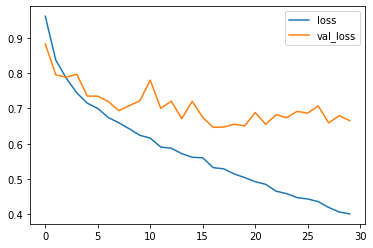

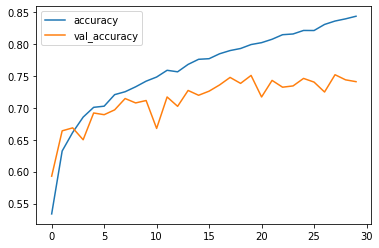

In [78]:
import pandas as pd
metrics = pd.DataFrame(history_final.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

Data terlihat overfit.

## Next steps

Congratulations! You have just completed simple hyperparameter choosing for your own network! Asides from all the properties we tested, neural network still contain other hyperparam such as number of layers and layer sizes. Try to play with them and conduct the experiments. See if you can beat your current model accuracy, and try to understand what parameter effect the accuracy and how to control them. Happy hunting!